Predict the percentage of marks of students based on number of hours of study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/content/student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


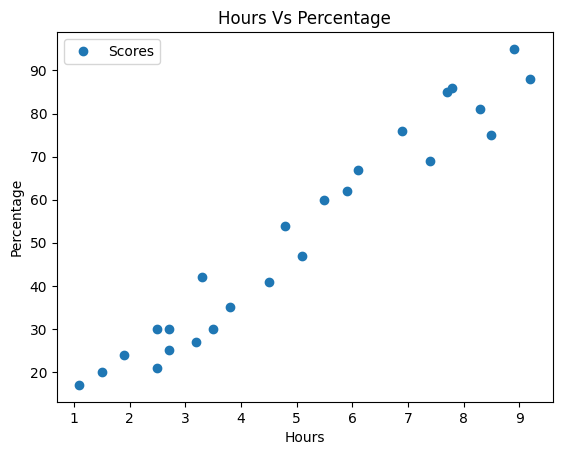

In [8]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [13]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [14]:
X_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=42)


In [16]:
X_train


array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [17]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88])

In [18]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [19]:
y_test

array([81, 30, 21, 76, 62])

In [20]:
from sklearn.linear_model import LinearRegression
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train,y_train)
y_pred = LinearRegressor.predict(X_train)


In [23]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

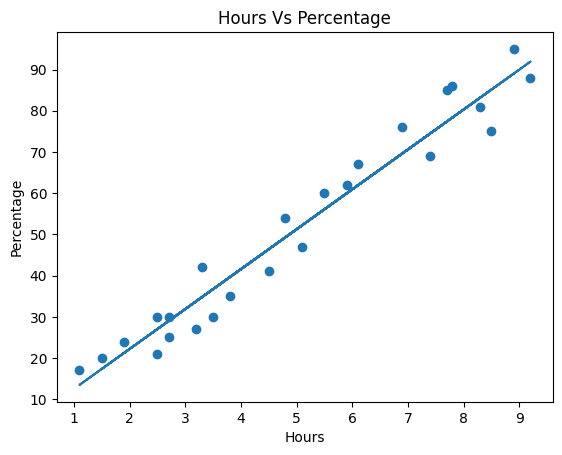

In [24]:
line = regressor.coef_*x + regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.title('Hours Vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()


In [25]:
#Test Accuracy
print(regressor.score(x_test,y_test))
#Train Accuracy
print(regressor.score(X_train,y_train))

0.9678055545167994
0.9491209376364416


In [26]:
y_test

array([81, 30, 21, 76, 62])

In [28]:
y_pred

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [29]:
y_pred[:5]

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959])

In [33]:
data = pd.DataFrame({'Actual': y_test,'Predict':y_pred[:5]})
data

,Actual,Predict
0,81,28.968503
1,30,34.777750
2,21,52.205491
3,76,39.618789
4,62,17.350010


In [34]:
print(regressor.predict([[9.25]]))

[92.38611528]


In [36]:
print(regressor.predict([[9.7]]))

[96.74305045]


In [37]:
mean_square_error = mean_squared_error(y_test,y_pred[:5])
mean_absolute_error = mean_absolute_error(y_test,y_pred[:5])
print(mean_square_error)
print(mean_absolute_error)

1404.2200673968694
33.80918778157651
